In [1]:
import numpy as np

from kmeans import *
import pandas as pd

# K-Means Clustering

## Algorithm Overview

K-means clustering is one of the most popular clustering techniques used by data scientists. It is an unsupervised machine learning algorithm so it is able to detect patterns in our dataset without using a target variable.  

I implemented the K-means from scratch and my `kmeans.py` implementation can be found in my repository.

K-means has one primary parameter, k, and this indicates to the algorithm how many clusters we want the data to be split into. To go into more detail about how everything works, I have outlined the steps of K-means below:  
1. Choose `k` random points in the dataset to be the initial centroids of our clusters
2. We go over each observation in our dataset and see which centroid is closest to it. Now we have `k` clusters with each point assigned to one!
3. We then recompute the centroids of each cluster by taking the average of all the points in each cluster.
4. Repeat steps 2 and 3 until the centroids no longer change anymore.
5. And we're done!

### Example: Grades

Below we have a toy example of how K-means looks like in action. Given a small dataset called `grades`, we choose 3 clusters to be created. From the output, we can observe that the grades in clusters K-means chose ranged from 74 to 87, 91 to 93, and 93 to 95. This is very cool as the clusters are in a way imitating the standard educational grading scale without us providing the algorithm what the grades mean.

In [2]:
grades = [92.65, 93.87, 74.06, 86.94, 92.26, 94.46, 92.94,
     92.94, 80.65, 92.86, 85.94, 91.79, 95.23, 85.37, 87.85, 87.71, 93.03]

k = 3

grades = np.array(grades).reshape(-1,1)

centroids, labels = kmeans(grades,k)
print('centroids:', centroids.reshape(1, -1))
print('labels for each x:', labels)
for j in range(k):
     print('vector assignments:', grades[labels==j].reshape(1,-1))

centroids: [[94.52       92.63857143 84.07428571]]
labels for each x: [1 0 2 2 1 0 1 1 2 1 2 1 0 2 2 2 1]
vector assignments: [[93.87 94.46 95.23]]
vector assignments: [[92.65 92.26 92.94 92.94 92.86 91.79 93.03]]
vector assignments: [[74.06 86.94 80.65 85.94 85.37 87.85 87.71]]


### Example: Breast Cancer Data

Another potential use case of K-means includes classification as well. Here, we have the well known breast cancer dataset.  
After running our K-means algorithm, we observe that our algorithm actually does a pretty good job at classifying the patients with breast cancer.

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# load our dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# scale the data for K-means
sc = StandardScaler()
X = sc.fit_transform(X)

# run the data through K-means
centroids, labels = kmeans(X, k=2, centroids='kmeans++', tolerance=0.01)

cancer = np.where(y==0)[0]
benign = np.where(y==1)[0]
len(cancer), len(benign)

centroids, y_pred = kmeans(X, k=2, centroids='kmeans++', tolerance=0.01)

true_benign = np.unique(y_pred[benign], return_counts=True)[1]
true_cancer = np.unique(y_pred[cancer], return_counts=True)[1]
conf_matrix = np.concatenate([[true_benign],
                              [true_cancer]], axis=0)

pd.DataFrame(conf_matrix)


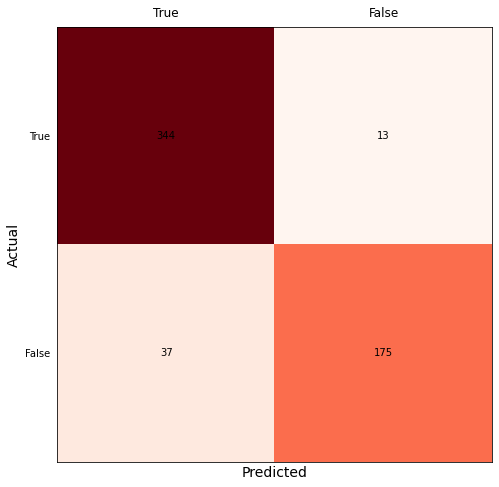

In [70]:
fig, ax = plt.subplots(figsize=(8,8))
tick_labels=['True', 'False']
ax.matshow(conf_matrix, cmap='Reds')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')

ax.set_xlabel('Predicted', size=14)
ax.set_ylabel('Actual', size=14)

ax.set_xticks([0,1])
ax.set_xticklabels(tick_labels, size=12)

ax.set_yticks([0,1])
ax.set_yticklabels(tick_labels, size=10)

ax.tick_params(bottom=False, top=False, left=False)
plt.show()

## Application to Image Compression

Another cool application of K-means also includes image compression. Using K-means, we can reduce the number of colors that a picture is originally using to 'summarize' it. Observe below where we take a picture of a cute dog and 'summarize' it using 4 clusters using K-means.

### Greyscale image

In [90]:
from PIL import Image

im = Image.open('doggy.jpeg')
h, w = im.size
X = np.asarray(im)
X = X.flatten().reshape(-1,1)

k=4
centroids, labels = kmeans(X, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points
img_ = Image.fromarray(X.reshape((w, h, 3)))

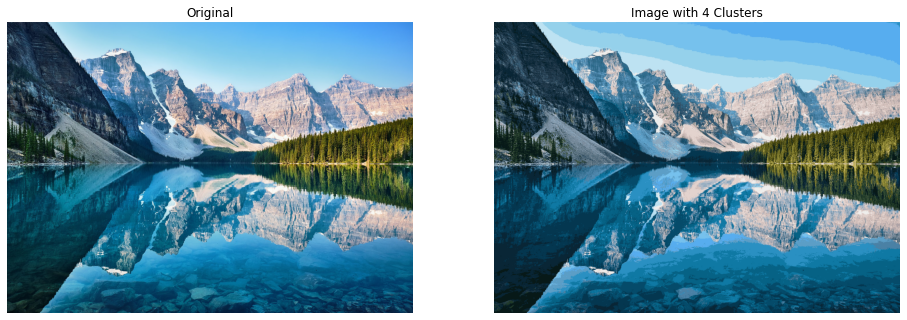

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

axs[0].imshow(im)
axs[1].imshow(img_)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Original')
axs[1].set_title('Image with 4 Clusters')
plt.show()

### Color

We can also apply this technique to color images as well. However, we will need more clusters to represent the image as there are many colors in the original image. In this example, we choose 32 clusters to summarize the picture.

In [104]:
im = Image.open('nature.jpeg')
h, w = im.size
X = np.asarray(im)
X = X.flatten().reshape(-1,3)

k=32
centroids, labels = kmeans(X, k=k, centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points
img_ = Image.fromarray(X.reshape((w, h, 3)))

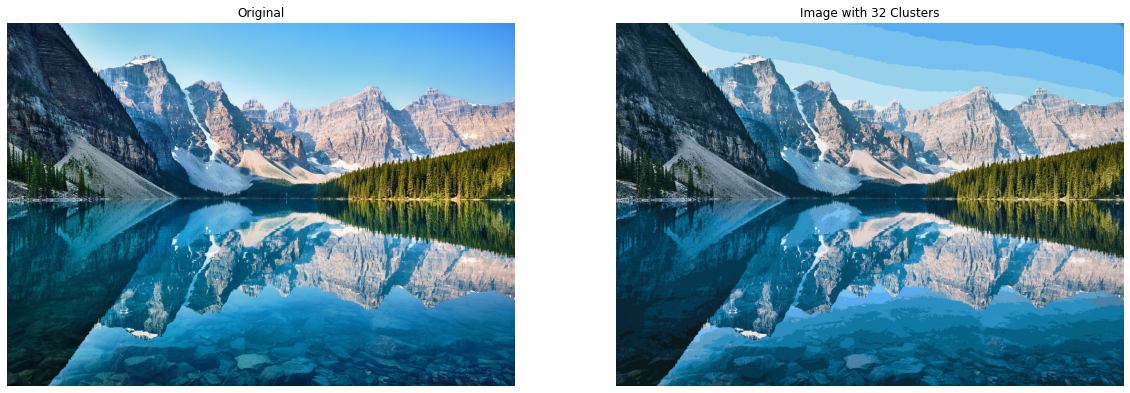

In [107]:
fig, axs = plt.subplots(1, 2, figsize=(20,12))

axs[0].imshow(im)
axs[1].imshow(img_)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Original')
axs[1].set_title('Image with 32 Clusters')
plt.show()

The compressed image turns out to look really similar to the original! We can notice that some of the blended colors in the sky are more separated, but the main details of the picture are still intact.

## Spectral Clustering

One of the problems that K-means has is that it groups points explicitly using their distances from the centroids. Usually this works well, but there are certain shapes and patterns where we observe a problem. See the example below with the circles dataset. 

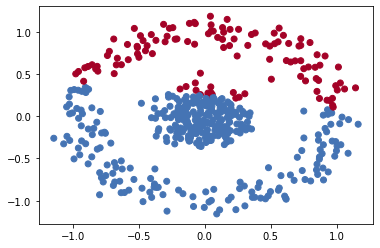

<Figure size 432x288 with 0 Axes>

In [112]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# from kmeans import *

X, _ = make_circles(n_samples=500, noise=0.1, factor=.2)
centroids, labels = kmeans(X, 2, centroids='kmeans++')

colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()
plt.savefig("/Users/jasonyu/Documents/GitHub/kmeans-jason-yu1/nested-kmeans.png", dpi=200)

By using a techinique called spectral clustering, we can more accurately cluster points in the circular shape in this example.

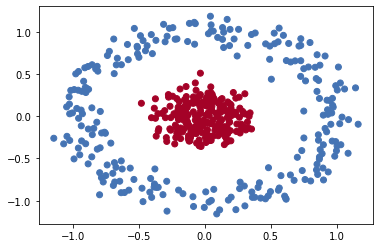

<Figure size 432x288 with 0 Axes>

In [113]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(n_clusters=2, affinity="nearest_neighbors")
labels = clustering.fit_predict(X)

colors=np.array(['#4574B4','#A40227'])
plt.scatter(X[:,0], X[:,1], c=colors[labels])
plt.show()
plt.savefig("/Users/jasonyu/Documents/GitHub/kmeans-jason-yu1/circle-spectral.png", dpi=200)

## Conclusion

K-means clustering is a super versatile algorithm and I hope that this article showed you how cool some of its applications are. After implementing the algorithm from scratch, I feel that I gained a better understanding of K-means really works. For more detail on how the algorithm works or any other questions, feel free to connect with me and chat!